# Linear Regression Tutorial with Keras
This is based on [the example from Google's Machine Learning course](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_taxi.ipynb?utm_source=mlcc&utm_campaign=colab-external&utm_medium=referral&utm_content=linear_regression#scrollTo=LihQB7ycKEnb).

In [3]:
!pip install google-ml-edu==0.1.3 \
  keras~=3.8.0 \
  matplotlib~=3.10.0 \
  numpy~=2.0.0 \
  pandas~=2.2.0 \
  tensorflow~=2.18.0

print('\n\nAll requirements successfully installed.')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 17.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [plotly]2m1/2 [plotly]


All requirements successfully installed.


In [31]:
#@title Code - Load dependencies

# data
import numpy as np
import pandas as pd

# machine learning
import keras
import ml_edu.experiment
import ml_edu.results

# data visualization
# 本家ではplotlyを使ってるけど，matplotlibにする
import matplotlib.pyplot as plt

# Read dataset

In [5]:
chicago_taxi_dataset = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/chicago_taxi_train.csv")

In [6]:
chicago_taxi_dataset

,TRIP_START_TIMESTAMP,TRIP_END_TIMESTAMP,TRIP_START_HOUR,TRIP_SECONDS,TRIP_MILES,TRIP_SPEED,PICKUP_CENSUS_TRACT,DROPOFF_CENSUS_TRACT,PICKUP_COMMUNITY_AREA,DROPOFF_COMMUNITY_AREA,FARE,TIPS,TIP_RATE,TOLLS,EXTRAS,TRIP_TOTAL,PAYMENT_TYPE,COMPANY
0,05/17/2022 7:15:00 AM,05/17/2022 7:45:00 AM,7.25,2341,2.57,4.0,NaN,NaN,NaN,17.0,31.99,2.00,6.3,0.0,0.0,33.99,Mobile,Flash Cab
1,05/17/2022 5:15:00 PM,05/17/2022 5:30:00 PM,17.25,1074,1.18,4.0,NaN,1.703108e+10,NaN,8.0,9.75,3.00,27.9,0.0,1.0,14.25,Credit Card,Flash Cab
2,05/17/2022 5:15:00 PM,05/17/2022 5:30:00 PM,17.25,1173,1.29,4.0,1.703132e+10,1.703108e+10,32.0,8.0,10.25,0.00,0.0,0.0,0.0,10.25,Cash,Sun Taxi
3,05/17/2022 6:00:00 PM,05/17/2022 7:00:00 PM,18.00,3360,3.70,4.0,1.703132e+10,1.703124e+10,32.0,24.0,23.75,0.00,0.0,0.0,1.0,24.75,Cash,Choice Taxi Association
4,05/17/2022 5:00:00 PM,05/17/2022 5:30:00 PM,17.00,1044,1.15,4.0,1.703132e+10,1.703108e+10,32.0,8.0,10.00,0.00,0.0,0.0,0.0,10.00,Cash,Flash Cab
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31689,05/17/2022 1:15:00 PM,05/17/2022 1:30:00 PM,13.25,739,13.06,63.6,NaN,NaN,75.0,28.0,32.50,0.00,0.0,0.0,0.0,32.50,Prcard,Blue Ribbon Taxi Association
31690,05/17/2022 9:45:00 PM,05/17/2022 10:15:00 PM,21.75,1740,30.90,63.9,NaN,NaN,76.0,NaN,44.50,10.00,13.9,0.0,27.5,82.00,Credit Card,Choice Taxi Association
31691,05/18/2022 3:45:00 AM,05/18/2022 4:00:00 AM,3.75,687,12.21,64.0,NaN,NaN,22.0,NaN,30.75,0.00,0.0,0.0,0.0,30.75,Prcard,Sun Taxi
31692,05/16/2022 2:45:00 PM,05/16/2022 3:30:00 PM,14.75,2040,36.60,64.6,NaN,NaN,76.0,7.0,41.75,11.55,25.2,0.0,4.0,57.30,Credit Card,"Taxicab Insurance Agency, LLC"


In [8]:
# Read some specific columns from the dataset
training_df = chicago_taxi_dataset.loc[:, ('TRIP_MILES', 'TRIP_SECONDS', 'FARE', 'COMPANY', 'PAYMENT_TYPE', 'TIP_RATE')]
training_df

,TRIP_MILES,TRIP_SECONDS,FARE,COMPANY,PAYMENT_TYPE,TIP_RATE
0,2.57,2341,31.99,Flash Cab,Mobile,6.3
1,1.18,1074,9.75,Flash Cab,Credit Card,27.9
2,1.29,1173,10.25,Sun Taxi,Cash,0.0
3,3.70,3360,23.75,Choice Taxi Association,Cash,0.0
4,1.15,1044,10.00,Flash Cab,Cash,0.0
...,...,...,...,...,...,...
31689,13.06,739,32.50,Blue Ribbon Taxi Association,Prcard,0.0
31690,30.90,1740,44.50,Choice Taxi Association,Credit Card,13.9
31691,12.21,687,30.75,Sun Taxi,Prcard,0.0
31692,36.60,2040,41.75,"Taxicab Insurance Agency, LLC",Credit Card,25.2


In [16]:
# Check the dataset
# DataFrame.describe(include=None)だと，数値データだけになる。
training_df.describe()

,TRIP_MILES,TRIP_SECONDS,FARE,TIP_RATE
count,31694.000000,31694.000000,31694.000000,31694.000000
mean,8.289463,1319.796397,23.905210,12.965785
std,7.265672,928.932873,16.970022,15.517765
min,0.500000,60.000000,3.250000,0.000000
25%,1.720000,548.000000,9.000000,0.000000
50%,5.920000,1081.000000,18.750000,12.200000
75%,14.500000,1888.000000,38.750000,20.800000
max,68.120000,7140.000000,159.250000,648.600000


In [17]:
# include='all'を指定すると，全てのデータに関してstatsが表示される。
training_df.describe(include='all')

,TRIP_MILES,TRIP_SECONDS,FARE,COMPANY,PAYMENT_TYPE,TIP_RATE
count,31694.000000,31694.000000,31694.000000,31694,31694,31694.000000
unique,NaN,NaN,NaN,31,7,NaN
top,NaN,NaN,NaN,Flash Cab,Credit Card,NaN
freq,NaN,NaN,NaN,7887,14142,NaN
mean,8.289463,1319.796397,23.905210,NaN,NaN,12.965785
std,7.265672,928.932873,16.970022,NaN,NaN,15.517765
min,0.500000,60.000000,3.250000,NaN,NaN,0.000000
25%,1.720000,548.000000,9.000000,NaN,NaN,0.000000
50%,5.920000,1081.000000,18.750000,NaN,NaN,12.200000
75%,14.500000,1888.000000,38.750000,NaN,NaN,20.800000


In [21]:
# 相関を表示する. 文字列を数値として扱おうとしてエラーになってしまうので，numeric_only=Trueを指定する。
training_df.corr(numeric_only=True)

,TRIP_MILES,TRIP_SECONDS,FARE,TIP_RATE
TRIP_MILES,1.000000,0.800855,0.975344,-0.049594
TRIP_SECONDS,0.800855,1.000000,0.830292,-0.084294
FARE,0.975344,0.830292,1.000000,-0.070979
TIP_RATE,-0.049594,-0.084294,-0.070979,1.000000


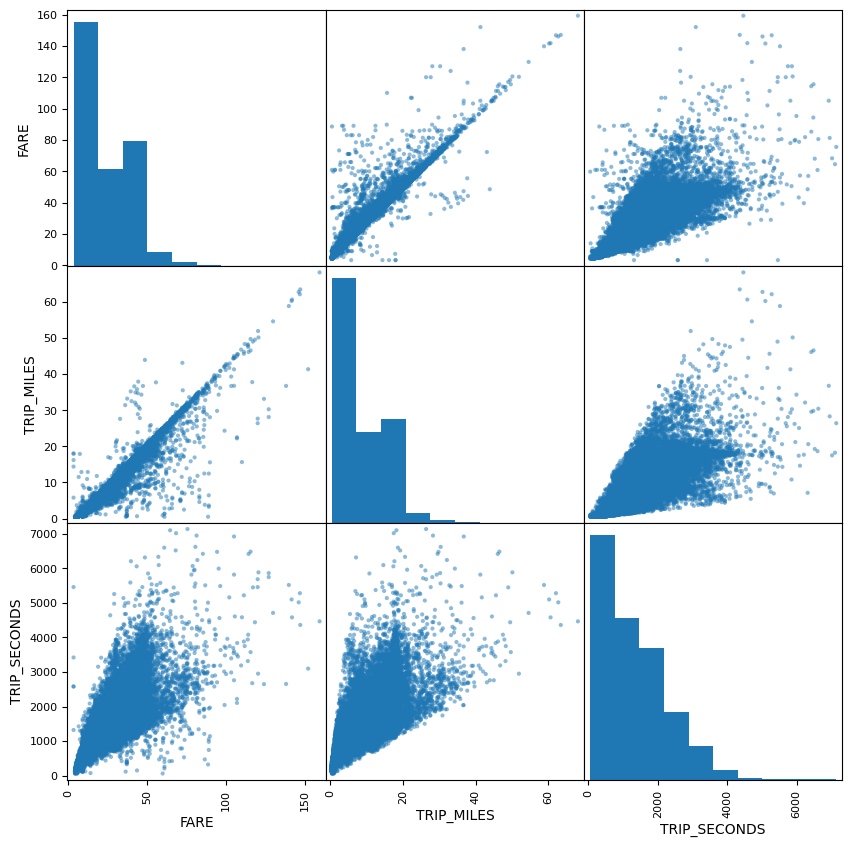

In [37]:
# ぺプロットを表示する。
from pandas.plotting import scatter_matrix
df_for_plot = training_df[["FARE", "TRIP_MILES", "TRIP_SECONDS"]]
scatter_matrix(df_for_plot, figsize=(10, 10))
plt.show()

In [ ]:
# Define model
